# W207 Final Project - BaseLine

## Submission by Sirisha Bhupathi and Abhi Sharma

This project is for the Kaggle competition listed here: https://www.kaggle.com/c/facial-keypoints-detection

## Objective

The objective of this project is to predict keypoint positions on face images.

## Introduction

The image sizes are 96 x 96 pixels and the key points are represented as location co-ordinates for each image. 
Location co-ordinates can have 2 values - one for x and one for y. 
There are a total of 30 location co-ordinates per image, 15 each for the x and y axis.
Out of the 30 co-ordinates in the test dataset for a single image, some co-ordinates are present and others need to be predicted. 
The number and type of co-ordinates that need to be predicted vary per test example.


## Methodology

This notebook introduces basic EDA and feature preparation for the test and training data.
We were able to successfully extract the images and plot the keypoints on top of them.

For now, we have just used the image pixel values (normalized by 255) as the features in the model.
We ran a vanilla neural network with 1 hidden layer for our baseline. We used standard activation functions for training (relu and sigmoid).

So far, we have a public score of 3.96505 on Kaggle with the above methodology.

## Next Steps

We intend to augment the image data set via a combination of image augmentation techniques - blurring / zooming, translation, rotation etc.
We will append this to the list of features for the dataset in our next iteration of training.

We will also use Convolutional Neural Nets and possibly certain pre-trained image neural network architectures for this task.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [2]:
#imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
train = pd.read_csv('../input/facial-keypoints-detection/training.zip')
test = pd.read_csv('../input/facial-keypoints-detection/test.zip')
idlookup = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')

In [4]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)
print(test.head())
train.head().T

Train shape: (7049, 31)
Test shape: (1783, 2)
   ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
#Missing values
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [6]:
train.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [7]:
columns = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y']

In [8]:
#Fill missing values with previous value in the row - we need to try other options
# train.fillna(method = 'ffill',inplace = True)
for col in columns:
    mean = np.mean(train[col])
    train[col] = train[col].fillna(mean)
train.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
#Split image columns and label columns
train_images = train[['Image']]
train_labels = train.drop('Image',axis=1)
print("train_images",train_images.head())
train_labels.head()

train_images                                                Image
0  238 236 237 238 240 240 239 241 241 243 240 23...
1  219 215 204 196 204 211 212 200 180 168 178 19...
2  144 142 159 180 188 188 184 180 167 132 84 59 ...
3  193 192 193 194 194 194 193 192 168 111 50 12 ...
4  147 148 160 196 215 214 216 217 219 220 206 18...


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [10]:
#split train image pixels
train_images = train_images['Image'].str.split(' ',expand=True)
train_images = train_images.astype(float)


#Split test image pixels
test_images = test.copy()
test_images = test_images.set_index("ImageId")
test_images = test_images['Image'].str.split(' ',expand=True)
test_images = test_images.astype(float)

train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238.0,236.0,237.0,238.0,240.0,240.0,239.0,241.0,241.0,243.0,...,33.0,29.0,30.0,34.0,39.0,49.0,62.0,70.0,75.0,90.0
1,219.0,215.0,204.0,196.0,204.0,211.0,212.0,200.0,180.0,168.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,144.0,142.0,159.0,180.0,188.0,188.0,184.0,180.0,167.0,132.0,...,64.0,60.0,56.0,61.0,70.0,69.0,71.0,78.0,78.0,77.0
3,193.0,192.0,193.0,194.0,194.0,194.0,193.0,192.0,168.0,111.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,147.0,148.0,160.0,196.0,215.0,214.0,216.0,217.0,219.0,220.0,...,33.0,34.0,37.0,37.0,43.0,46.0,83.0,140.0,170.0,176.0


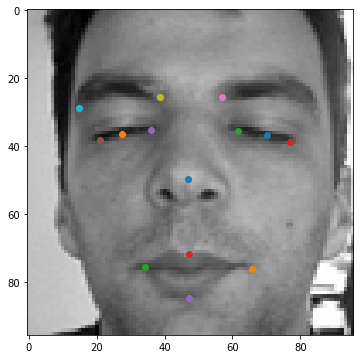

In [11]:
#plot images and keypoints
imageno=66 #try different images
plt.figure(figsize=(6,6))
plt.imshow(np.array(train_images.iloc[imageno]).reshape(96,96),cmap='gray')
for i in range(0,30,2):
    plt.scatter(train_labels.iloc[imageno][i],train_labels.iloc[imageno][i+1])
plt.show()

In [12]:
#normalize train and test data
train_images = train_images/255
train_labels = train_labels/96
test_images = test_images/255

In [21]:
numTrainExamples = train_images.shape[0]
numTrainExamples

7049

In [26]:
train_images.shape

(7049, 9216)

In [30]:
train_images_2d = train_images.values.reshape(-1,96,96,1)
train_images_2d.shape

(7049, 96, 96, 1)

In [29]:
train_labels.shape

(7049, 30)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import optimizers
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse','mae'])

history = model.fit(train_images_2d, train_labels, epochs = 50,batch_size = numTrainExamples,validation_split = 0.2)

ValueError: Input 0 of layer conv2d_37 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 9216]

In [15]:
#predict for test
pred = model.predict(test_images)
print(np.min(pred))
print(np.max(pred))
print(np.min(model.predict(train_images)))

0.16421825
0.8265999
0.16421825


In [16]:
#look up table
print(idlookup.head(2))
idlookup = idlookup.drop('Location',axis=1)
print(idlookup.head(2))

   RowId  ImageId        FeatureName  Location
0      1        1  left_eye_center_x       NaN
1      2        1  left_eye_center_y       NaN
   RowId  ImageId        FeatureName
0      1        1  left_eye_center_x
1      2        1  left_eye_center_y


In [17]:
feature_names = train_labels.columns
predictions = pd.DataFrame(pred, columns = feature_names)
predictions = predictions * 96

predictions.head()
predictions.stack().reset_index()
predictions = predictions.stack().reset_index()
predictions.columns = ['index','FeatureName','Location']

imageids = test['ImageId']
imageids = imageids.reset_index()
# imageids

predictions = predictions.merge(imageids, left_on='index', right_on='index')
predictions = predictions.drop('index',axis=1)

predictions

,FeatureName,Location,ImageId
0,left_eye_center_x,66.190491,1
1,left_eye_center_y,37.705578,1
2,right_eye_center_x,30.137238,1
3,right_eye_center_y,37.959274,1
4,left_eye_inner_corner_x,59.134254,1
...,...,...,...
53485,mouth_right_corner_y,76.334770,1783
53486,mouth_center_top_lip_x,48.210331,1783
53487,mouth_center_top_lip_y,72.877594,1783
53488,mouth_center_bottom_lip_x,48.481041,1783


In [18]:
submission = idlookup.merge(predictions, left_on=['FeatureName','ImageId'], right_on=['FeatureName','ImageId'])
submission = submission[['RowId','Location']]
submission = submission.set_index('RowId')
submission

,Location
RowId,
1,66.190491
2,37.705578
3,30.137238
4,37.959274
5,59.134254
...,...
27120,37.946152
27121,48.307812
27122,61.991444


In [19]:
submission.to_csv('submission.csv')